## MNIST Digit Recognition using CNN

In [13]:
# For data processing
import numpy as np
from keras.utils.np_utils import to_categorical

# For building CNN
import keras
from keras.datasets import mnist

# For building CNN
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D, Flatten, Dense # Main layers

from keras.layers import Dropout

# For visualization of CNN network
from IPython.display import Image, SVG
import matplotlib.pyplot as plt
%matplotlib inline
from keras.utils.vis_utils import model_to_dot

# Data Loading and Preprocessing

In [14]:
# Loads the training and test data sets
(X_train, y_train), (X_test, y_test) = mnist.load_data()

In [15]:
first_image = X_train[0, :, :]

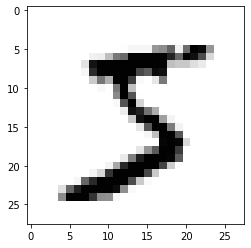

In [16]:
# To interpret the values as a 28x28 image, we need to reshape
# the numpy array, which is one dimensional.
plt.imshow(first_image, cmap=plt.cm.Greys);

In [17]:
num_classes = len(np.unique(y_train))
num_classes

10

In [18]:
# 60K training 28 x 28 (pixel) images
X_train.shape

(60000, 28, 28)

In [19]:
# 10K test 28 x 28 (pixel) images
X_test.shape

(10000, 28, 28)

Next, we need to reshape our dataset inputs (X_train and X_test) to the shape that our model expects when we train the model. The first number is the number of images (60,000 for X_train and 10,000 for X_test). Then comes the shape of each image (28x28). The last number is 1, which signifies that the images are greyscale.

In [20]:
# The training and test data sets are integers, ranging from 0 to 255.
# We reshape the training and test data sets to be a 4D tensor.
# Dimensions: num_images x 28 x 28 x 1
# The 1 is because we have a single channel (greyscale). 
# If RGB color images, we'd have 3 channels.
X_train = X_train.reshape(60000, 28, 28, 1).astype('float32')
X_test = X_test.reshape(10000, 28, 28, 1).astype('float32')
input_shape = (28, 28, 1)

In [21]:
# Normalize - Scales the training and test data to range 
# between 0 and 1.

max_value = X_train.max()
X_train /= max_value
X_test /= max_value

In [22]:
# The training and test labels are integers from 0 to 9 indicating the class label
(y_train, y_test)

(array([5, 0, 4, ..., 5, 6, 8], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

We need to ‘one-hot-encode’ our target variable. This means that a column will be created for each output category and a binary variable is inputted for each category. For example, we saw that the first image in the dataset is a 5. This means that the sixth number in our array will have a 1 and the rest of the array will be filled with 0.

In [24]:
# We convert the class labels to binary class matrices
y_train = to_categorical(y_train, num_classes)
y_test = to_categorical(y_test, num_classes)

In [25]:
(y_train, y_test)

(array([[0., 0., 0., ..., 0., 0., 0.],
        [1., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 1., 0.]], dtype=float32),
 array([[0., 0., 0., ..., 1., 0., 0.],
        [0., 0., 1., ..., 0., 0., 0.],
        [0., 1., 0., ..., 0., 0., 0.],
        ...,
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.],
        [0., 0., 0., ..., 0., 0., 0.]], dtype=float32))

# Convolutional Neural Net (ConvNet)

The model type that we will be using is Sequential. Sequential is the easiest way to build a model in Keras. It allows you to build a model layer by layer.

We use the ‘add()’ function to add layers to our model.

- Our first is Conv2D layer. This is convolution layer that will deal with our input images, which are seen as 2-dimensional matrices.

- 32 in the first Conv2D layer and 64 in the second Conv2D layer are the number of nodes/neurons in each layer. This number can be adjusted to be higher or lower, depending on the size of the dataset. In our case, 32 and 64 work well, so we will stick with this for now.

- Kernel size is the size of the filter matrix for our convolution. So a kernel size of 3 means we will have a 3x3 filter matrix.

- Our first layer also takes in an input shape. This is the shape of each input image, 28,28,1 as seen earlier on, with the 1 signifying that the images are greyscale.

- In between the Conv2D layers and the dense layer, there is a ‘Flatten’ layer. Flatten serves as a connection between the convolution and dense layers.

- ‘Dense’ is the layer type we will use in for our output layer. Dense is a standard layer type that is used in many cases for neural networks. We will have 10 nodes in our output layer, one for each possible outcome (0–9).

- The activation is ‘softmax’. Softmax makes the output sum up to 1 so the output can be interpreted as probabilities. The model will then make its prediction based on which option has the highest probability.

In [27]:
input_shape = (28, 28, 1)

model = Sequential()

model.add(Conv2D(filters = 32, 
                 kernel_size=(3, 3), 
                 strides=(1, 1),
                 activation='relu',
                 input_shape=input_shape))

model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Conv2D(filters = 64, 
                 kernel_size = (3, 3), 
                 activation='relu'))

model.add(Dropout(rate = 0.25, seed = 500)) # For regularization
model.add(MaxPooling2D(pool_size=(2, 2)))

model.add(Flatten())
model.add(Dense(units = 128, activation='relu'))

model.add(Dropout(rate = 0.5, seed=500)) # For regularization
model.add(Dense(units = num_classes, activation='softmax'))

# Dropout - rate	float - 0 and 1. 
# Fraction of the input units to drop.

## Summarize Model

**Number of paramters in Conv2D**

((w * h * d)+1)* k)

- w - Width of the filter
- h - height of the filter
- d - depth (for the firstconv2d) OR no.of filters in the previous layer
- 1 - one bias for one filter
- k - number of filters in the current layer

**Number of paramters in dense layer**

total params = weights+biases = (nc x np)+(nc*1)

- nc = current layer neurons 
- np = previous layer neurons

In [28]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 32)        320       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        18496     
_________________________________________________________________
dropout (Dropout)            (None, 11, 11, 64)        0         
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 128)               2

**Number of paramters:**

**1. conv2d** - ((w * h * d)+1)* k) = ((3x3x1)+1)*32 = 10*32 = 320

here, 3 (w) x 3 (h) filter and depth of the image is 1 (d) since it is grey scale, k=32, number of filters

**2. conv2d_1** - ((w * h * d)+1)* k) = ((3x3x32)+1)*64 

filter size = 11 (w) x 11 (h)
d - no.of filters in the previous layer (d) = 32
k - no.of filters in this layer

**3. dense** - (nc x np)+(nc*1) = (128*1600)+(128*1) = 204928

nc = no.of current layer neurons = 128
np = no. of previous layer neurons = 1600
     OR the number of outputs from previous flatten layer

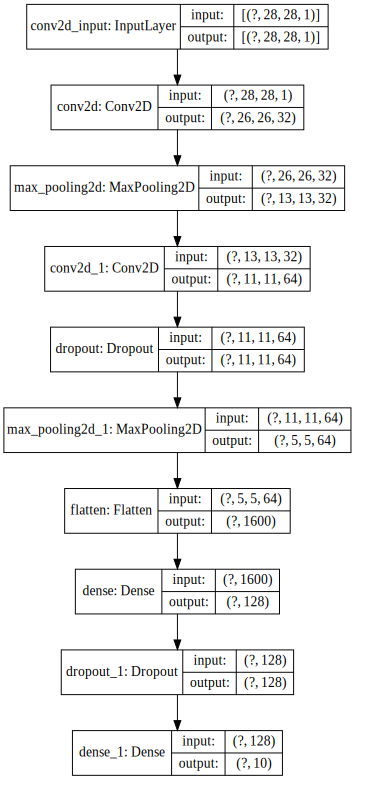

In [33]:
SVG(model_to_dot(model, 
                 show_shapes=True, dpi=70).create(prog='dot', format='svg'))

## Train Classifier

Next, we need to compile our model. Compiling the model takes three parameters: optimizer, loss and metrics.

The optimizer controls the learning rate. We will be using ‘adam’ as our optmizer. Adam is generally a good optimizer to use for many cases. The adam optimizer adjusts the learning rate throughout training.

The learning rate determines how fast the optimal weights for the model are calculated. A smaller learning rate may lead to more accurate weights (up to a certain point), but the time it takes to compute the weights will be longer.

We will use ‘categorical_crossentropy’ for our loss function. This is the most common choice for classification. A lower score indicates that the model is performing better.

To make things even easier to interpret, we will use the ‘accuracy’ metric to see the accuracy score on the validation set when we train the model.

In [35]:
# Trains the model, iterating on the training data in batches of 128 in 5 epochs.
# Using the Adam optimizer.
model.compile(optimizer='adam', 
              loss='categorical_crossentropy', 
              metrics=['accuracy'])

Now we will train our model. To train, we will use the ‘fit()’ function on our model with the following parameters: training data (train_X), target data (train_y), validation data, and the number of epochs.

The number of epochs is the number of times the model will cycle through the data. The more epochs we run, the more the model will improve, up to a certain point. After that point, the model will stop improving during each epoch. For our model, we will set the number of epochs to 5.

In [36]:
model.fit(X_train, 
          y_train, 
          batch_size=128, 
          epochs=3, 
          verbose=1)

Epoch 1/3
469/469 [==============================] - 17s 36ms/step - loss: 0.2989 - accuracy: 0.9068
Epoch 2/3
469/469 [==============================] - 16s 34ms/step - loss: 0.1006 - accuracy: 0.9704
Epoch 3/3
469/469 [==============================] - 14s 31ms/step - loss: 0.0750 - accuracy: 0.9775


## Model Evaluation

For our validation data, we will use the test set provided to us in our dataset, which we have split into X_test and y_test.

In [37]:
# Test accuracy is ~99%. - Returns Loss and Accuracy
model.evaluate(X_test, y_test)

313/313 [==============================] - 1s 3ms/step - loss: 0.0364 - accuracy: 0.9878


[0.03640258312225342, 0.9878000020980835]

## Predicting a Couple of Held-Out Images

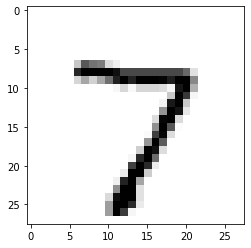

In [38]:
first_test_image = X_test[0, :]
plt.imshow(first_test_image.reshape(28, 28), cmap=plt.cm.Greys);

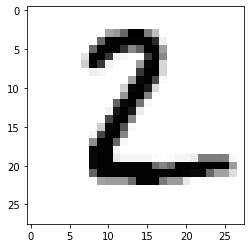

In [39]:
second_test_image = X_test[1, :]
plt.imshow(second_test_image.reshape(28, 28), cmap=plt.cm.Greys);

In [40]:
model.predict_classes(X_test[[0], :])

Instructions for updating:
Please use instead:* `np.argmax(model.predict(x), axis=-1)`,   if your model does multi-class classification   (e.g. if it uses a `softmax` last-layer activation).* `(model.predict(x) > 0.5).astype("int32")`,   if your model does binary classification   (e.g. if it uses a `sigmoid` last-layer activation).


array([7])

In [41]:
model.predict_classes(X_test[[1], :])

array([2])

In [42]:
# Predict for both the digits
model.predict_classes(X_test[[0, 1], :])

array([7, 2])